# Music Recommender System

### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics.pairwise import cosine_similarity

from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import cosine_similarity

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [2]:
# loading the dataset
df=pd.read_csv('Songs.csv')

In [6]:
# Checking the data
df.head(5)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,04-Apr,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,04-Apr,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,05-Apr,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,04-Apr,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,04-Apr,0.390


## EDA & Data Visualization

In [7]:
# checking the shape of data 
df.shape

(6910, 18)

In [8]:
# checking for data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6910 entries, 0 to 6909
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genre             6910 non-null   object 
 1   artist_name       6910 non-null   object 
 2   track_name        6910 non-null   object 
 3   track_id          6910 non-null   object 
 4   popularity        6910 non-null   int64  
 5   acousticness      6910 non-null   float64
 6   danceability      6910 non-null   float64
 7   duration_ms       6910 non-null   int64  
 8   energy            6910 non-null   float64
 9   instrumentalness  6910 non-null   float64
 10  key               6910 non-null   object 
 11  liveness          6910 non-null   float64
 12  loudness          6910 non-null   float64
 13  mode              6910 non-null   object 
 14  speechiness       6910 non-null   float64
 15  tempo             6910 non-null   float64
 16  time_signature    6910 non-null   object 


In [9]:
## checking for the null value
df.isnull().sum()

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

### It is good to see that dataset does not have any missing values.

In [10]:
## Checking the distribution of the numerical columns
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
popularity,6910.0,45.071201,22.606410,0.000000,29.00000,50.000000,63.00000,91.000
acousticness,6910.0,0.357149,0.351980,0.000002,0.03200,0.218000,0.69400,0.996
danceability,6910.0,0.572596,0.179041,0.059600,0.46000,0.583500,0.70500,0.965
duration_ms,6910.0,236755.259334,133975.102935,21667.000000,184216.00000,219390.000000,260510.00000,3631469.000
energy,6910.0,0.575908,0.259215,0.000267,0.39800,0.606000,0.78700,0.998
instrumentalness,6910.0,0.118914,0.274881,0.000000,0.00000,0.000019,0.01020,0.997
liveness,6910.0,0.201696,0.179394,0.013000,0.09810,0.126500,0.24100,1.000
loudness,6910.0,-9.166273,5.774939,-47.046000,-11.09325,-7.533000,-5.41100,0.491
speechiness,6910.0,0.117064,0.170061,0.023000,0.03660,0.051300,0.11000,0.963
tempo,6910.0,118.469559,30.917615,32.244000,94.00450,116.878000,139.88025,220.041


In [11]:
# Renaming a feature
df=df.rename(columns={'track_name':'Song_name',})

In [12]:
df.head()

,genre,artist_name,Song_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,04-Apr,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,04-Apr,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,05-Apr,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,04-Apr,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,04-Apr,0.390


In [14]:
# Here, I am dropping a features which does not carry information
df1=df.drop(['key','time_signature'],axis=1)

In [15]:
df1.head()

,genre,artist_name,Song_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,speechiness,tempo,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,0.3460,-1.828,Major,0.0525,166.969,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,0.1510,-5.559,Minor,0.0868,174.003,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,0.1030,-13.879,Minor,0.0362,99.488,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,0.0985,-12.178,Major,0.0395,171.758,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,0.2020,-21.150,Major,0.0456,140.576,0.390


In [17]:
## Dropping a duplicate values
df1.duplicated(subset=['artist_name','Song_name'],keep='last').sum()
df2=df1.drop_duplicates(subset=['artist_name','Song_name'],keep='last')

In [18]:
df2.shape

(6807, 16)

### we can see that 113 duplicate entries are removed.There's still a possibility that some duplicates remain, perhaps different versions of a song (e.g., radio version vs. album versions). At the moment, that's not a big concern, so I'll continue with the analysis.

In [19]:
## checking for the genere
df2['genre'].value_counts()

Folk                643
Hip-Hop             626
Alternative         567
Anime               437
Country             415
Movie               386
Classical           382
Dance               328
Blues               325
R&B                 310
Reggae              294
Electronic          284
Ska                 269
Reggaeton           218
Jazz                197
Comedy              188
Children's Music    165
Rap                 138
Rock                124
Pop                 121
A Capella           119
Opera               111
Soul                 86
Indie                74
Name: genre, dtype: int64

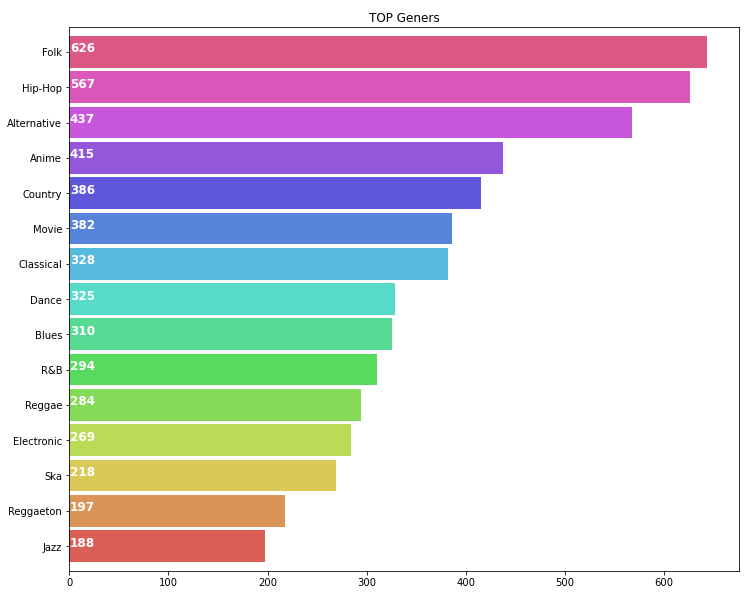

In [15]:
## Top 15 geners
plt.subplots(figsize=(12,10))
a=[]
for i in df2['genre']:
    a.append(i)
am=pd.Series(a).value_counts()[0:15].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('hls',15))
for i,v in enumerate(pd.Series(a).value_counts()[0:16].sort_values(ascending=True).values):
     am.text(.8,i,v,fontsize=12,color='white',weight='bold')
plt.title("TOP Geners")
plt.show()

### From above observation we can said that the Folk and Hip-Hop have more numbers of song as comapre to the others genres.
### Reggaeton and Jazz genres have shows less song counts.

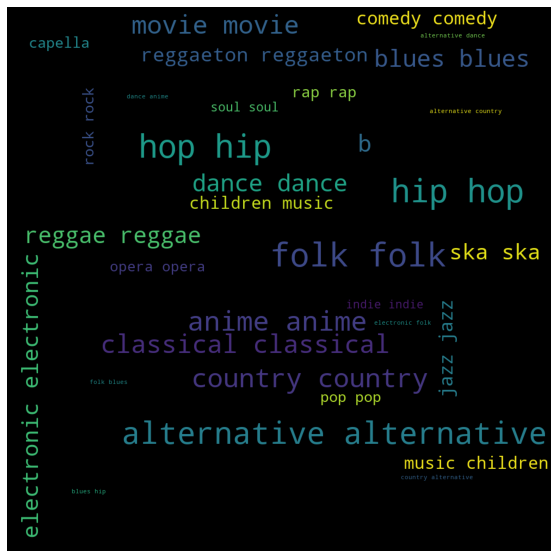

In [21]:
##FOR GENRE
#Here is a wordcloud generated using the different genres available in the genres data.
plt.subplots(figsize=(12,12))
stop_words = set(stopwords.words('english'))
word=[]
for i in df2['genre']:
    word.append(i)
word=pd.Series(word)
word=([i for i in word.str.lower() if i not in stop_words])
wc = WordCloud(background_color="black", max_words=2000, stopwords=STOPWORDS, max_font_size= 60,width=1000,height=1000)
wc.generate(" ".join(word))
plt.imshow(wc)
plt.axis('off')
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

In [22]:
## checking for the artists name
df1['artist_name'].value_counts()

Chorus             99
Henri Salvador     83
Enzo Garcia        79
Johannes Brahms    59
Nobuo Uematsu      48
                   ..
Khea                1
Valee               1
Fugees              1
YFN Lucci           1
Bay Ledges          1
Name: artist_name, Length: 2758, dtype: int64

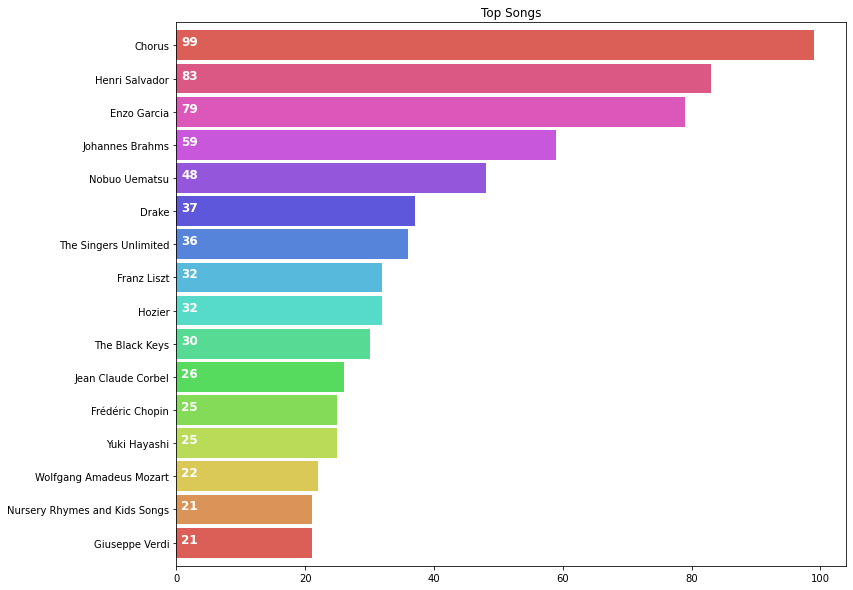

In [23]:
## Top 15 artists name
plt.subplots(figsize=(12,10))
A=[]
for i in df2['artist_name']:
    A.append(i)
ab=pd.Series(A).value_counts()[0:16].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('hls',15))
for i,v in enumerate(pd.Series(A).value_counts()[:16].sort_values(ascending=True).values):
    ab.text(.8,i,v,fontsize=12,color='white',weight='bold')
plt.title('Top Songs')
plt.show()

### Most of the songs in a dataset are of artists chorus and Henri Salvador followed Enzo Garcia.


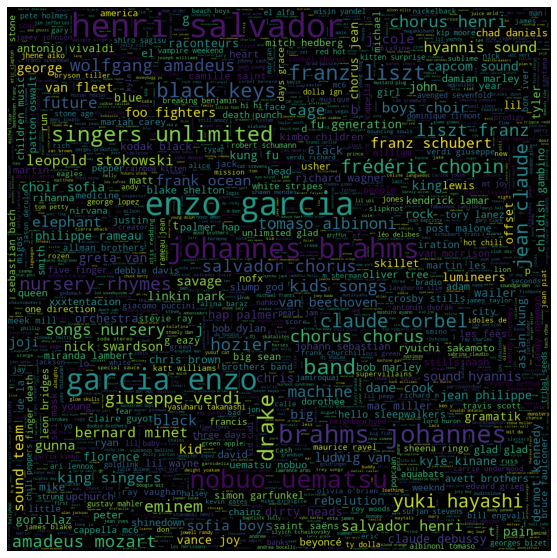

In [24]:
##Here is a wordcloud generated using the different artists available in the data.
plt.subplots(figsize=(12,12))
stop_words = set(stopwords.words('english'))
word=[]
for i in df2['artist_name']:
    word.append(i)
word=pd.Series(word)
word=([i for i in word.str.lower() if i not in stop_words])
wc = WordCloud(background_color="black", max_words=2000, stopwords=STOPWORDS, max_font_size= 60,width=1000,height=1000)
wc.generate(" ".join(word))
plt.imshow(wc)
plt.axis('off')
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

In [26]:
## Checking the distribution of the numerical columns
df2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
popularity,6807.0,44.726164,22.583809,0.000000,29.00000,50.000000,63.0000,91.000
acousticness,6807.0,0.358255,0.352731,0.000002,0.03195,0.218000,0.6975,0.996
danceability,6807.0,0.571595,0.179360,0.059600,0.45900,0.582000,0.7045,0.965
duration_ms,6807.0,236910.504334,134837.674114,21667.000000,184008.50000,219333.000000,260540.0000,3631469.000
energy,6807.0,0.575890,0.260221,0.000267,0.39750,0.606000,0.7880,0.998
instrumentalness,6807.0,0.120366,0.276432,0.000000,0.00000,0.000019,0.0109,0.997
liveness,6807.0,0.202209,0.180134,0.013000,0.09800,0.127000,0.2420,1.000
loudness,6807.0,-9.191074,5.805315,-47.046000,-11.13200,-7.540000,-5.4140,0.491
speechiness,6807.0,0.117344,0.170959,0.023000,0.03655,0.051300,0.1100,0.963
tempo,6807.0,118.474344,30.937708,32.244000,93.99850,116.904000,139.8835,220.041


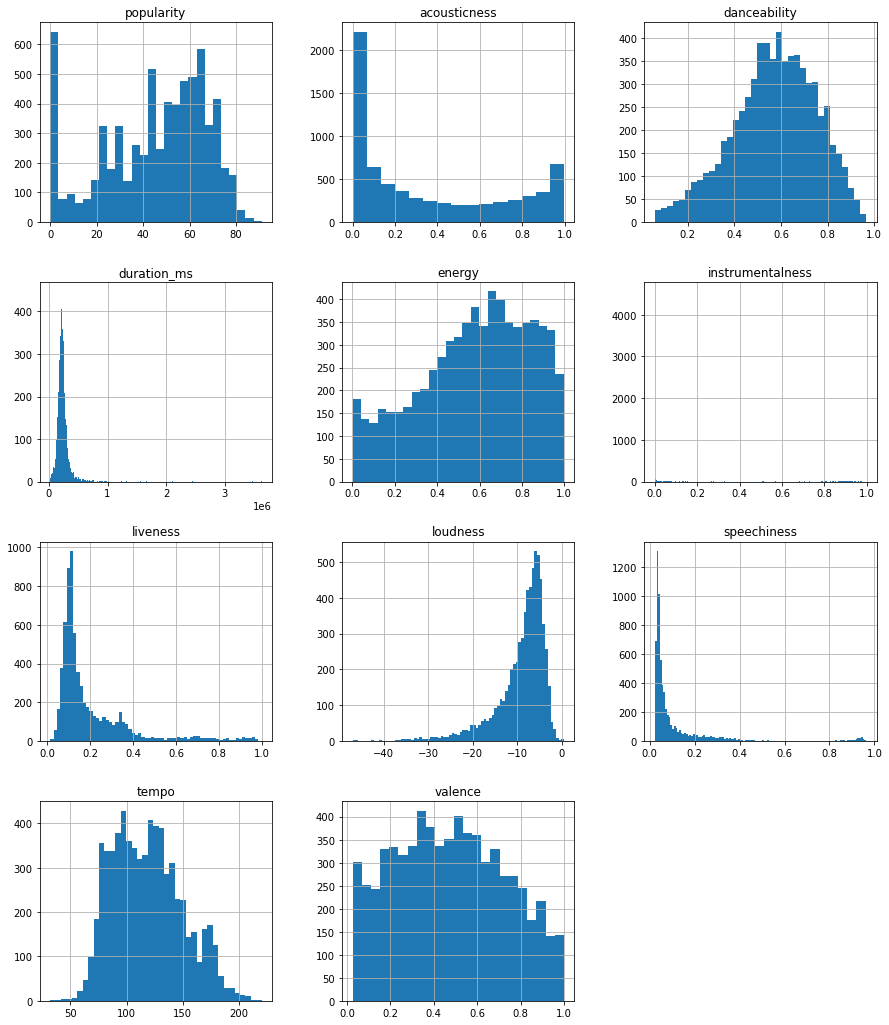

In [27]:
## Let's explore the distribution of the data using visualization
df2.hist(figsize=(15,18),bins='auto');

### From above observation, we can clearly see that dataset is not normally distributed.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Promises (with Sam Smith)'),
  Text(1, 0, 'Te Vi'),
  Text(2, 0, 'Un Año'),
  Text(3, 0, 'BEBE (feat. Anuel Aa)'),
  Text(4, 0, 'MALA (feat. Anuel Aa)'),
  Text(5, 0, 'Amigos Con Derechos'),
  Text(6, 0, 'Starboy'),
  Text(7, 0, "'Till I Collapse"),
  Text(8, 0, 'Unforgettable'),
  Text(9, 0, 'Power Over Me'),
  Text(10, 0, 'No Brainer'),
  Text(11, 0, 'Mala Mía'),
  Text(12, 0, 'Aullando'),
  Text(13, 0, 'Dusk Till Dawn - Radio Edit'),
  Text(14, 0, 'Me Rehúso'),
  Text(15, 0, 'Million Reasons'),
  Text(16, 0, 'Girls Have Fun (feat. G-Eazy & Rich The Kid)'),
  Text(17, 0, 'Sanctuary'),
  Text(18, 0, 'High On Life (feat. Bonn)'),
  Text(19, 0, 'Hotel California - Eagles 2013 Remaster')])

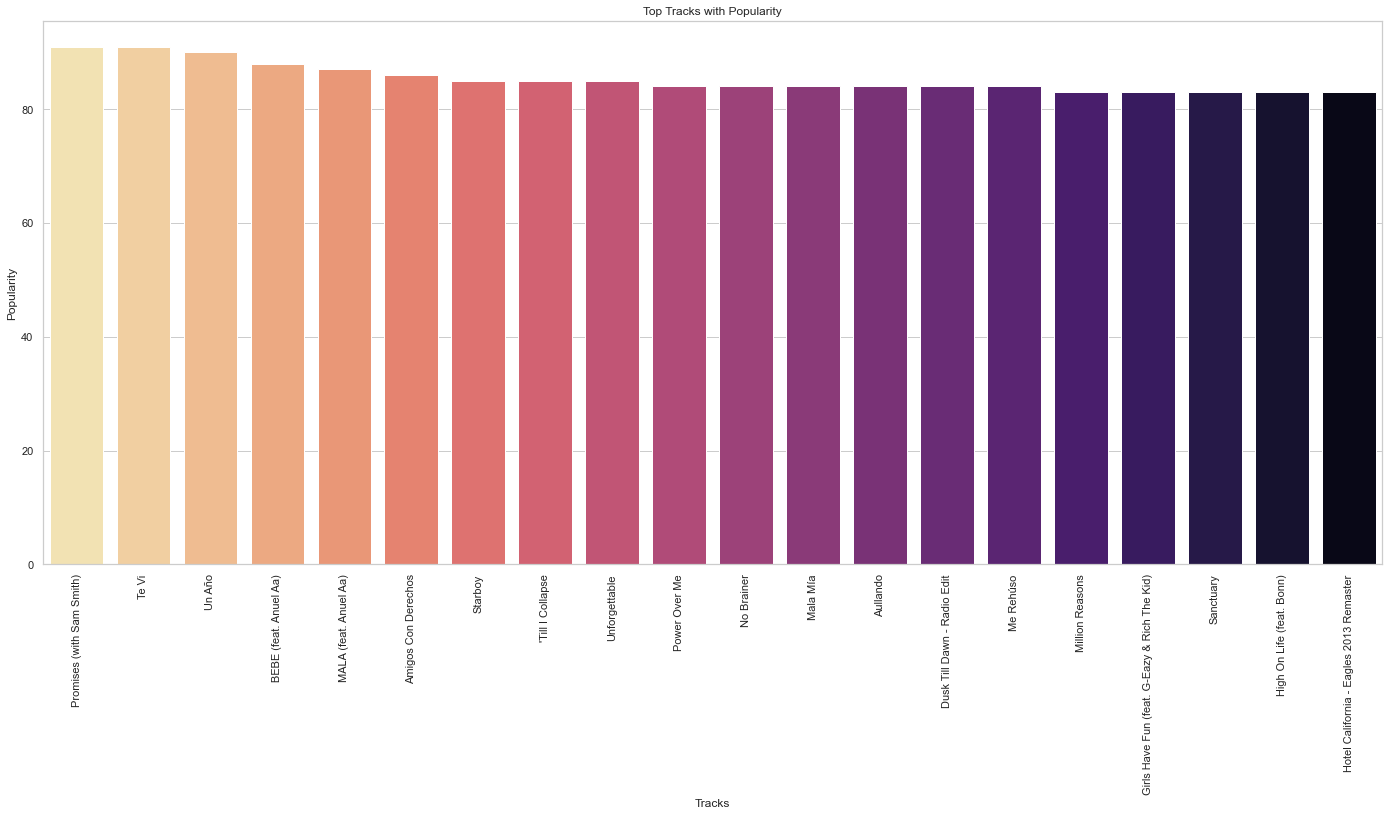

In [28]:
## Top 20 songs with popularity
plt.figure(figsize=(24, 10))
sns.set(style="whitegrid")
x = df2.groupby("Song_name")["popularity"].mean().sort_values(ascending=False).head(20)
axis = sns.barplot(x.index, x, palette='magma_r')
axis.set_title('Top Tracks with Popularity')
axis.set_ylabel('Popularity')
axis.set_xlabel('Tracks')
plt.xticks(rotation = 90)

### From above observation we conclude that song name Promises (with Sam Smith) is most poular song followed by song Te Vi.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Piso 21'),
  Text(1, 0, 'Sebastian Yatra'),
  Text(2, 0, 'French Montana'),
  Text(3, 0, 'Danny Ocean'),
  Text(4, 0, 'Martin Garrix'),
  Text(5, 0, 'Zac Efron'),
  Text(6, 0, 'Rvssian'),
  Text(7, 0, 'Mark Ronson'),
  Text(8, 0, 'Macklemore & Ryan Lewis'),
  Text(9, 0, '6ix9ine'),
  Text(10, 0, 'Twenty One Pilots'),
  Text(11, 0, 'NSG'),
  Text(12, 0, 'Seeb'),
  Text(13, 0, 'A$AP Ferg'),
  Text(14, 0, 'The Fray'),
  Text(15, 0, 'Ed Sheeran'),
  Text(16, 0, 'Lukas Graham'),
  Text(17, 0, 'Macklemore'),
  Text(18, 0, 'Grupo Arranke'),
  Text(19, 0, 'Rex Orange County')])

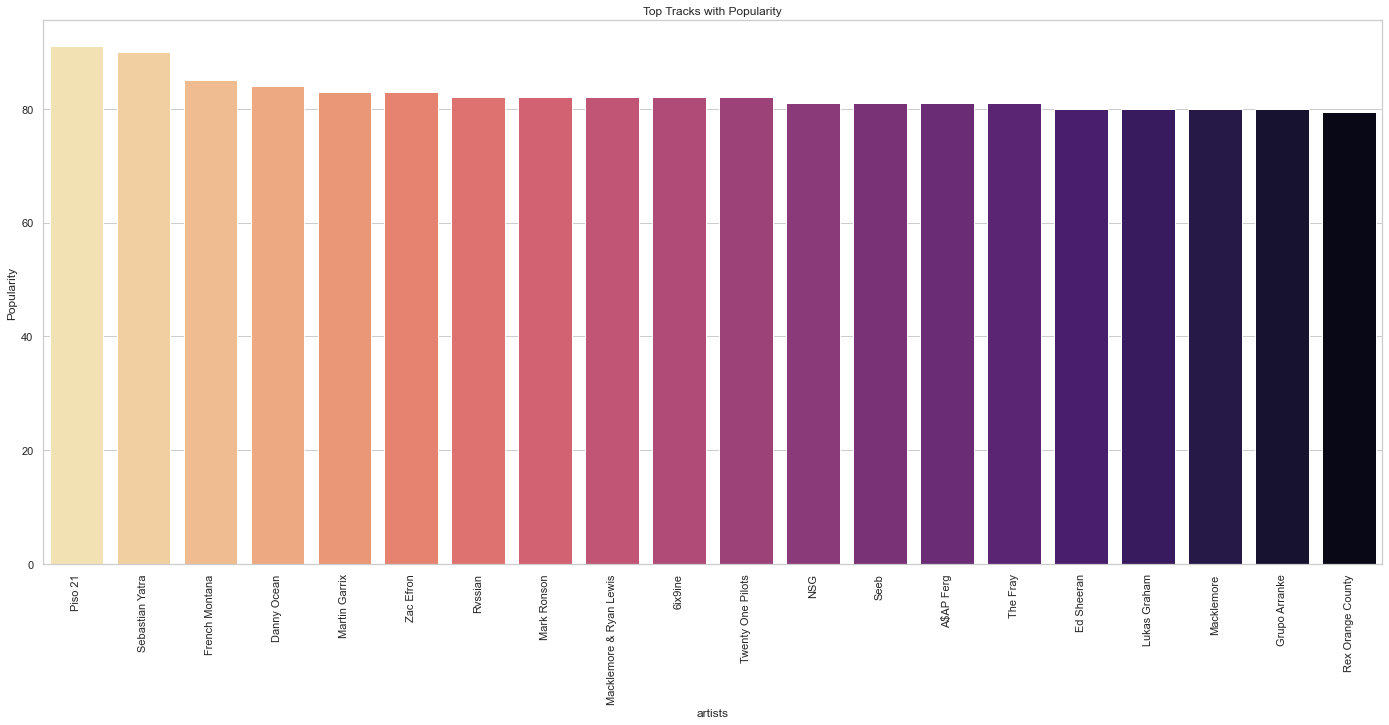

In [29]:
## Top 20 artists with popularity
plt.figure(figsize=(24, 10))
sns.set(style="whitegrid")
x = df2.groupby("artist_name")["popularity"].mean().sort_values(ascending=False).head(20)
axis = sns.barplot(x.index, x, palette='magma_r')
axis.set_title('Top Tracks with Popularity')
axis.set_ylabel('Popularity')
axis.set_xlabel('artists')
plt.xticks(rotation = 90)

### From above observation we conclude that the artists name Piso 21 and Sebastian Yatra have more popular songs.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Hot In Herre'),
  Text(1, 0, 'Shake That'),
  Text(2, 0, 'So High - Acoustic'),
  Text(3, 0, 'Every Season'),
  Text(4, 0, 'Antes de Dormir'),
  Text(5, 0, 'Lick'),
  Text(6, 0, 'BLACKJACK (feat. YBN Cordae) - Remix'),
  Text(7, 0, 'Frostbite (Remix) (feat. Offset & Rich The Kid)'),
  Text(8, 0, 'Only in the West'),
  Text(9, 0, 'Still Think About You'),
  Text(10, 0, 'Drogba (Joanna) - WizKid Remix'),
  Text(11, 0, 'Me Superé'),
  Text(12, 0, 'Catch Me Outside'),
  Text(13, 0, 'No Flockin'),
  Text(14, 0, 'Flood Watch'),
  Text(15, 0, 'Pretty Ugly'),
  Text(16, 0, 'Caroline'),
  Text(17, 0, 'Cash War'),
  Text(18, 0, 'Identity Theft'),
  Text(19, 0, 'Movin’ Up')])

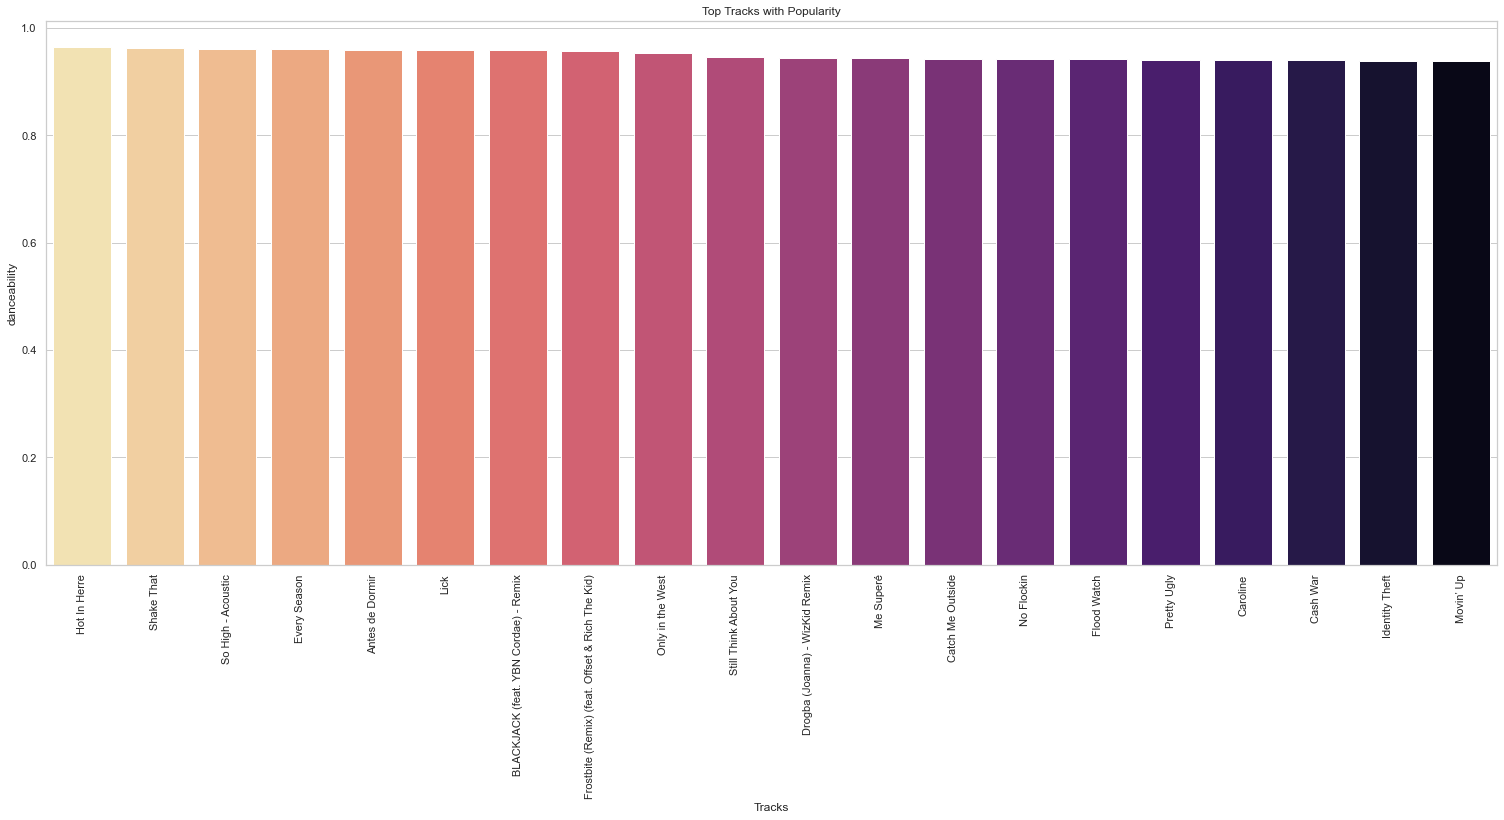

In [30]:
## Top 20 songs by energy
plt.figure(figsize=(26, 10))
sns.set(style="whitegrid")
x = df2.groupby("Song_name")["danceability"].mean().sort_values(ascending=False).head(20)
axis = sns.barplot(x.index, x, palette='magma_r')
axis.set_title('Top Tracks with Popularity')
axis.set_ylabel('danceability')
axis.set_xlabel('Tracks')
plt.xticks(rotation = 90)

### From above observation we conclude that the  song name Hot In Herre and Shake That have more enerigzed songs.

False


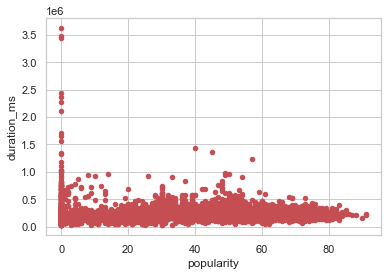

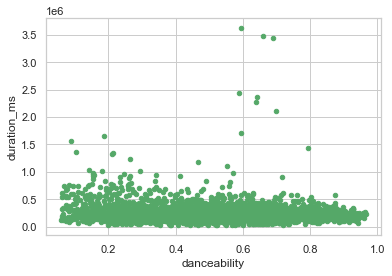

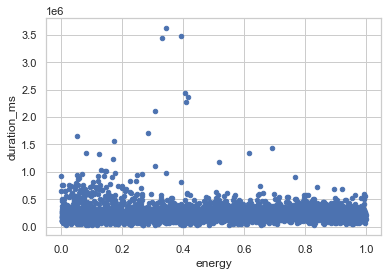

In [31]:
ax1 = df2.plot(kind='scatter', x='popularity', y='duration_ms', color='r')    
ax2 = df2.plot(kind='scatter', x='danceability', y='duration_ms', color='g')    
ax3 = df2.plot(kind='scatter', x='energy', y='duration_ms', color='b')

print(ax1 == ax2 == ax3)  # True

# MODEL BUILDING

## First we will build model using cosine similarity score.

# COSINE SIMILARITY

### Data preparation.

In [32]:
## For similarity based model we only choosed catagorical columns i.e geners and artist name
df3=df2[['genre','artist_name','Song_name','track_id']]
df3.head()

,genre,artist_name,Song_name,track_id
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK


In [33]:
df3.shape

(6807, 4)

In [34]:
## Cleaning of the text
df3['artist_name']=df3['artist_name'].apply(lambda x:x.replace('&',''))
df3['artist_name']=df3['artist_name'].apply(lambda x:x.replace('-',''))
df3['artist_name']=df3['artist_name'].apply(lambda x:x.replace('"',''))
df3['artist_name']=df3['artist_name'].apply(lambda x:x.replace('.',''))
df3['artist_name']=df3['artist_name'].apply(lambda x:x.replace('+',''))
df3['Song_name']=df3['Song_name'].apply(lambda x:x.replace("'",""))

In [35]:
df3.head()

,genre,artist_name,Song_name,track_id
0,Movie,Henri Salvador,Cest beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV
1,Movie,Martin les fées,Perdu davance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP
2,Movie,Joseph Williams,Dont Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK


In [36]:
## Now convert text into lower case
df3['artist_name']=df3['artist_name'].apply(lambda x:x.lower())
df3['genre']=df3['genre'].apply(lambda x:x.lower())
df3.head()

,genre,artist_name,Song_name,track_id
0,movie,henri salvador,Cest beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV
1,movie,martin les fées,Perdu davance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP
2,movie,joseph williams,Dont Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy
3,movie,henri salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf
4,movie,fabien nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK


In [37]:
## Converting text into list 
df3['genre']=df3['genre'].apply(lambda x:x.split())
df3['artist_name']=df3['artist_name'].apply(lambda x:x.split())
df3.head()

,genre,artist_name,Song_name,track_id
0,[movie],"[henri, salvador]",Cest beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV
1,[movie],"[martin, les, fées]",Perdu davance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP
2,[movie],"[joseph, williams]",Dont Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy
3,[movie],"[henri, salvador]",Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf
4,[movie],"[fabien, nataf]",Ouverture,0IuslXpMROHdEPvSl1fTQK


####  we have created Tags column by the addition of genere and artist_name

In [39]:
df3['Tags']=df3['genre']+df3['artist_name']
df3.head()

,genre,artist_name,Song_name,track_id,Tags
0,[movie],"[henri, salvador]",Cest beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,"[movie, henri, salvador]"
1,[movie],"[martin, les, fées]",Perdu davance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,"[movie, martin, les, fées]"
2,[movie],"[joseph, williams]",Dont Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,"[movie, joseph, williams]"
3,[movie],"[henri, salvador]",Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,"[movie, henri, salvador]"
4,[movie],"[fabien, nataf]",Ouverture,0IuslXpMROHdEPvSl1fTQK,"[movie, fabien, nataf]"


In [40]:
## Converting list into string
df3['Tags']=df3['Tags'].apply(lambda x:" ".join(x))
df3.head()

,genre,artist_name,Song_name,track_id,Tags
0,[movie],"[henri, salvador]",Cest beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,movie henri salvador
1,[movie],"[martin, les, fées]",Perdu davance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,movie martin les fées
2,[movie],"[joseph, williams]",Dont Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,movie joseph williams
3,[movie],"[henri, salvador]",Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,movie henri salvador
4,[movie],"[fabien, nataf]",Ouverture,0IuslXpMROHdEPvSl1fTQK,movie fabien nataf


In [41]:
df3.head()

,genre,artist_name,Song_name,track_id,Tags
0,[movie],"[henri, salvador]",Cest beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,movie henri salvador
1,[movie],"[martin, les, fées]",Perdu davance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,movie martin les fées
2,[movie],"[joseph, williams]",Dont Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,movie joseph williams
3,[movie],"[henri, salvador]",Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,movie henri salvador
4,[movie],"[fabien, nataf]",Ouverture,0IuslXpMROHdEPvSl1fTQK,movie fabien nataf


### Text Vectoraization

In [42]:
cv = CountVectorizer()
vectors = cv.fit_transform(df3['Tags'])

In [43]:
vectors.shape

(6807, 3772)

In [44]:
vectors[0]

<1x3772 sparse matrix of type '<class 'numpy.int64'>'
	with 3 stored elements in Compressed Sparse Row format>

In [45]:
similarity=cosine_similarity(vectors)

In [46]:
song_index=df3[df3['Song_name']=='Perdu davance (par Gad Elmaleh)'].index[0]
song_index

1

In [47]:
df3.iloc[5000]

genre                                                [classical]
artist_name                            [johann, sebastian, bach]
Song_name      Choral "Jesu, meine Freude" de la Cantate "Her...
track_id                                  0p6eXDSAFhKm9CB192DLeB
Tags                             classical johann sebastian bach
Name: 5103, dtype: object

In [48]:
def recommend(songs):
    song_index=df3[df3['Song_name']==songs].index[0]
    distances=similarity[song_index]
    songs_list=sorted(list(enumerate(distances)),reverse=True,key=lambda x:x[1])[1:11]
    
    for i in songs_list:
        print(df3.iloc[i[0]].Song_name)

In [49]:
result1=recommend("Ouverture")

I Try
Wake Up
Helka
Mangala Aarti
Ladies And Gentlemen
Clic clac cloc
Mangani – Do Banjare / Amba Heth
A ty się śmiejesz ze mnie
Ambarsare Diyan Warhiyan
For the Game


# Nearest neighoubr

In [50]:
df4=df2.drop(['genre','artist_name','Song_name'],axis=1)
df4.head()

,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,speechiness,tempo,valence
0,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,0.3460,-1.828,Major,0.0525,166.969,0.814
1,0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,0.1510,-5.559,Minor,0.0868,174.003,0.816
2,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,0.1030,-13.879,Minor,0.0362,99.488,0.368
3,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,0.0985,-12.178,Major,0.0395,171.758,0.227
4,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,0.2020,-21.150,Major,0.0456,140.576,0.390


In [51]:
df4['mode'].value_counts()

Major    4554
Minor    2253
Name: mode, dtype: int64

In [52]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [53]:
df4['mode']=le.fit_transform(df4['mode'])

In [54]:
df4.head()

,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,speechiness,tempo,valence
0,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,0.3460,-1.828,0,0.0525,166.969,0.814
1,0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,0.1510,-5.559,1,0.0868,174.003,0.816
2,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,0.1030,-13.879,1,0.0362,99.488,0.368
3,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,0.0985,-12.178,0,0.0395,171.758,0.227
4,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,0.2020,-21.150,0,0.0456,140.576,0.390


## Nearest Neighbors with Ball Tree

In [55]:
from sklearn.neighbors import NearestNeighbors

In [56]:
df4.drop(['track_id'],axis=1,inplace=True)

In [57]:
df4.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,speechiness,tempo,valence
0,0,0.611,0.389,99373,0.910,0.000,0.3460,-1.828,0,0.0525,166.969,0.814
1,1,0.246,0.590,137373,0.737,0.000,0.1510,-5.559,1,0.0868,174.003,0.816
2,3,0.952,0.663,170267,0.131,0.000,0.1030,-13.879,1,0.0362,99.488,0.368
3,0,0.703,0.240,152427,0.326,0.000,0.0985,-12.178,0,0.0395,171.758,0.227
4,4,0.950,0.331,82625,0.225,0.123,0.2020,-21.150,0,0.0456,140.576,0.390


In [58]:
songs_Recomand = NearestNeighbors(n_neighbors=11, algorithm='ball_tree').fit(df4)

In [59]:
#Get the distances and indices: the indices to pull the recommended neighbors, and the distances for evaluation later
distances, indices = songs_Recomand.kneighbors(df4)

In [60]:
distances[1]

array([  0.        ,  83.82115492, 157.87275887, 218.34489041,
       253.38847959, 277.50911636, 374.21613191, 377.13130522,
       392.76101915, 429.95142849, 445.81840746])

In [61]:
def recommend_songs(song=None,id=None):
    if id:
        for id in indices[id][1:]:
            print(df.iloc[id]["Song_name"])
    if song:
        recommendations = []
        found_id =df[df['Song_name']==song].index[0]
        for id in indices[found_id][1:]:
            recommendations.append((df.iloc[id]["Song_name"], df.iloc[id]["artist_name"]))
            print(df.iloc[id]["Song_name"], df.iloc[id]["artist_name"])
        return recommendations

In [62]:
results2 = recommend_songs("Ouverture")

Swan Lake, Op. 20, Act II No. 10: Act II By a Lake: No. 10. Scene: Moderato Pyotr Ilyich Tchaikovsky
メカメカメケメケ Yuki Hayashi
Hey! Calorie Queen Ayana Taketatsu
Symphony No.4 In E Minor Op.98 : II. Andante Leopold Stokowski
Redemption Song No Use For A Name
Felices JEN
L'aiguille creuse - Partie 1 Michel Roux
Dura Daddy Yankee
Fire & Desire Drake
Ionic Breeze Bill Engvall


## Nearest Neighbors with KD Tree

In [63]:
songs_nn2 = NearestNeighbors(n_neighbors=11, algorithm='kd_tree', leaf_size = 40, metric = 'euclidean').fit(df4)

In [64]:
distances2, indices2 = songs_nn2.kneighbors(df4)

In [65]:
def recommend_songs_2(song=None,id=None):
    if id:
        for id in indices2[id][1:]:
            print(df.iloc[id]["Song_name"])
    if song:
        recommendations = []
        found_id =df[df['Song_name']==song].index[0]
        for id in indices2[found_id][1:]:
            recommendations.append((df.iloc[id]["Song_name"], df.iloc[id]["artist_name"]))
            print(df.iloc[id]["Song_name"], df.iloc[id]["artist_name"])
        return recommendations

In [66]:
results3 = recommend_songs_2("Ouverture")

Swan Lake, Op. 20, Act II No. 10: Act II By a Lake: No. 10. Scene: Moderato Pyotr Ilyich Tchaikovsky
メカメカメケメケ Yuki Hayashi
Hey! Calorie Queen Ayana Taketatsu
Symphony No.4 In E Minor Op.98 : II. Andante Leopold Stokowski
Redemption Song No Use For A Name
Felices JEN
L'aiguille creuse - Partie 1 Michel Roux
Dura Daddy Yankee
Fire & Desire Drake
Ionic Breeze Bill Engvall


# K-Means

In [67]:
cluster_pipeline = Pipeline([('scaler', StandardScaler()), ('kmeans', KMeans(n_clusters=10, ))])
X = df4.select_dtypes(np.number)
cluster_pipeline.fit(X)
df4['cluster'] = cluster_pipeline.predict(X)

In [68]:
df4 = df4.drop(columns=['duration_ms','popularity'])

In [69]:
songs_nn3 = NearestNeighbors(n_neighbors=11, algorithm='kd_tree', leaf_size = 40, metric = 'euclidean').fit(df4)

In [70]:
distances3, indices3 = songs_nn3.kneighbors(df4)

In [71]:
def recommend_songs_3(song=None):
        recommendations = []
        found_id =df[df['Song_name']==song].index[0]
        for id in indices3[found_id][1:]:
            recommendations.append((df.iloc[id]["Song_name"], df.iloc[id]["artist_name"]))
            print(df.iloc[id]["Song_name"], df.iloc[id]["artist_name"])
        return recommendations

In [72]:
results4 = recommend_songs_3("Ouverture")

Walls Could Talk Halsey
This Little Light Of Mine Enzo Garcia
Serenade No. 1 in D Major, Op. 11: IV. Menuettos I & II Johannes Brahms
Lollipop Lil Wayne
Pass The Shoe Enzo Garcia
Through and Through khai dreams
The Fool On the Hill The Singers Unlimited
Moondance Van Morrison
Peanut Butter Smack Dane Cook
Unity Desmond Dekker


In [73]:
recommend('Keys of Love')

Afterglow
Forgotten Dreams
Lost Chords Sentiments
Caprice
チム・チム・チェリー (竹内永和 編)
Helka
Mangala Aarti
Ladies And Gentlemen
Clic clac cloc
Mangani – Do Banjare / Amba Heth


# Model Evaluations

In [74]:
from tabulate import tabulate

In [ ]:
Walls Could Talk Halsey
This Little Light Of Mine Enzo Garcia
Serenade No. 1 in D Major, Op. 11: IV. Menuettos I & II Johannes Brahms
Lollipop Lil Wayne
Pass The Shoe Enzo Garcia
Through and Through khai dreams
The Fool On the Hill The Singers Unlimited
Moondance Van Morrison
Peanut Butter Smack Dane Cook
Unity Desmond Dekker

In [75]:
table = [['I Try','Swan Lake, Op. 20, Act II No. 10: Act II By a Lake: No. 10. Scene: Moderato Pyotr Ilyich Tchaikovsky','Swan Lake, Op. 20, Act II No. 10: Act II By a Lake: No. 10. Scene: Moderato Pyotr Ilyich Tchaikovsky','Walls Could Talk Halsey'], 
        ['Wake Up','メカメカメケメケ Yuki Hayashi','メカメカメケメケ Yuki Hayashi','This Little Light Of Mine Enzo Garcia'], 
        ['Helka','Hey! Calorie Queen Ayana Taketatsu','Hey! Calorie Queen Ayana Taketatsu','Serenade No. 1 in D Major, Op. 11: IV. Menuettos I & II Johannes Brahms'],
        ['Mangala Aarti','Symphony No.4 In E Minor Op.98 : II. Andante Leopold Stokowski','Symphony No.4 In E Minor Op.98 : II. Andante Leopold Stokowski','Lollipop Lil Wayne'],
        ['Ladies And Gentlemen','Redemption Song No Use For A Name','Redemption Song No Use For A Name','Pass The Shoe Enzo Garcia'],
        ['Clic clac cloc','Felices JEN','Felices JEN','Through and Through khai dreams'],
        ['Mangani – Do Banjare / Amba Heth',"L'aiguille creuse - Partie 1 Michel Roux","L'aiguille creuse - Partie 1 Michel Roux",'The Fool On the Hill The Singers Unlimited'],
        ['A ty się śmiejesz ze mnie','Dura Daddy Yankee','Dura Daddy Yankee','Moondance Van Morrison'],
        ['Ambarsare Diyan Warhiyan','Fire & Desire Drake','Fire & Desire Drake','Peanut Butter Smack Dane Cook'],
        ['For the Game','Ionic Breeze Bill Engvall','Ionic Breeze Bill Engvall','Unity Desmond Dekker']] 

#define column names
col_names = ["Cosine Similarity", "KNN With Ball_tree","KNN with KD_tree","K-means"]

#display table
print(tabulate(table, headers=col_names,showindex="always"))

    Cosine Similarity                 KNN With Ball_tree                                                                                    KNN with KD_tree                                                                                      K-means
--  --------------------------------  ----------------------------------------------------------------------------------------------------  ----------------------------------------------------------------------------------------------------  -----------------------------------------------------------------------
 0  I Try                             Swan Lake, Op. 20, Act II No. 10: Act II By a Lake: No. 10. Scene: Moderato Pyotr Ilyich Tchaikovsky  Swan Lake, Op. 20, Act II No. 10: Act II By a Lake: No. 10. Scene: Moderato Pyotr Ilyich Tchaikovsky  Walls Could Talk Halsey
 1  Wake Up                           メカメカメケメケ Yuki Hayashi                                                                         メカメカメケメケ Yuki Hayashi                 

In [76]:
mean_distance3 = distances3.mean()

In [77]:
mean_distance3

1.4392548761250392

In [78]:
mean_distance = distances.mean()
mean_distance

1526.9147027537024

In [79]:
mean_distance2=distances2.mean()
mean_distance2

1526.9147027537024

In [80]:
Table=[['Knn with Ball_tree',1526.91],
      ['KNN with KD_tree',1526.91],
      ['K-mean',1.4392]]

#define column names
col_names = ["Models",'Mean_distance_score']

#display table
print(tabulate(Table, headers=col_names,showindex="always",tablefmt="fancy_grid"))

╒════╤════════════════════╤═══════════════════════╕
│    │ Models             │   Mean_distance_score │
╞════╪════════════════════╪═══════════════════════╡
│  0 │ Knn with Ball_tree │             1526.91   │
├────┼────────────────────┼───────────────────────┤
│  1 │ KNN with KD_tree   │             1526.91   │
├────┼────────────────────┼───────────────────────┤
│  2 │ K-mean             │                1.4392 │
╘════╧════════════════════╧═══════════════════════╛


## Conclusion 

## From above result the Mean_distance_score of both KNN with Ball_tree and KNN with kd_tree are large i.e.1526.91 as compare to the k-mean i.e 1.4392 it means k-mean gives more similar songs as comapre to others .

## While the cosine similarity model using geners also giving proper results as it depends on genere and artist_name .

## So that we can used either cosine similarity or k-mean model for deployment.

In [76]:
import pickle

In [77]:
pickle.dump(df3.to_dict(),open('songs_dict.pkl','wb'))

In [78]:
pickle.dump(similarity,open('similarity.pkl','wb'))